In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prophet import Prophet

In [2]:
df_2012 = pd.read_csv("Exchange_Rate_Report_2012.csv")
df_2013 = pd.read_csv("Exchange_Rate_Report_2013.csv")
df_2014 = pd.read_csv("Exchange_Rate_Report_2014.csv")
df_2015 = pd.read_csv("Exchange_Rate_Report_2015.csv")
df_2016 = pd.read_csv("Exchange_Rate_Report_2016.csv")
df_2017 = pd.read_csv("Exchange_Rate_Report_2017.csv")
df_2018 = pd.read_csv("Exchange_Rate_Report_2018.csv")
df_2019 = pd.read_csv("Exchange_Rate_Report_2019.csv")
df_2020 = pd.read_csv("Exchange_Rate_Report_2020.csv")
df_2021 = pd.read_csv("Exchange_Rate_Report_2021.csv")
df_2022 = pd.read_csv("Exchange_Rate_Report_2022.csv")

# Merge all the data into a single DataFrame
frames = [df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
full_data = pd.concat(frames, axis=0, ignore_index=True)

In [3]:
# Reset the index to make 'Date' a column again
full_data.reset_index(inplace=True)

# Convert 'Date' column to datetime
full_data['Date'] = pd.to_datetime(full_data['Date'], format='%d-%b-%y')

# Sort the DataFrame by 'Date'
full_data.sort_values(by='Date', inplace=True)

# Set 'Date' as the index
full_data.set_index('Date', inplace=True)

# Removing whitespaces in column names
full_data.columns = full_data.columns.str.strip()
# Assuming your DataFrame is named 'full_data'
full_data.columns = full_data.columns.str.replace(r'\s+\(', '(', regex=True)



# Handle missing values if necessary (e.g., forward fill, backward fill, interpolate)
# full_data = full_data.ffill()  # Forward fill missing values
full_data = full_data.interpolate()  # Interpolate missing values

# Check for missing values again
#print(full_data.isnull().sum())

In [4]:
full_data

,index,Algerian dinar(DZD),Australian dollar(AUD),Bahrain dinar(BHD),Bolivar Fuerte(VEF),Botswana pula(BWP),Brazilian real(BRL),Brunei dollar(BND),Canadian dollar(CAD),Chilean peso(CLP),...,Swedish krona(SEK),Swiss franc(CHF),Thai baht(THB),Trinidadian dollar(TTD),Tunisian dinar(TND),U.A.E. dirham(AED),U.K. pound(GBP),U.S. dollar(USD),Uruguayan peso(UYU),Bolivar Soberano(VES)
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,0,NaN,0.971440,0.376,NaN,NaN,1.8485,1.2925,1.0090,518.20,...,NaN,0.9334,NaN,NaN,1.49870,3.6725,0.640574,1,19.7000,NaN
2012-01-04,1,NaN,0.965904,0.376,4.2893,7.490637,1.8304,1.2874,1.0135,514.34,...,6.8152,0.9384,31.463,6.4062,1.49420,3.6725,0.641190,1,19.6890,NaN
2012-01-05,2,NaN,0.968711,0.376,4.2893,7.530120,1.8432,1.2883,1.0197,512.23,...,6.8493,0.9492,31.557,6.3886,1.49510,3.6725,0.644330,1,19.7070,NaN
2012-01-06,3,76.3243,0.978378,0.376,4.2893,7.530120,1.8416,1.2923,1.0232,511.80,...,6.8860,0.9516,31.637,6.3994,1.50460,3.6725,0.645245,1,19.6785,NaN
2012-01-09,4,76.5183,0.983284,0.376,4.2893,7.530120,1.8442,1.2994,1.0272,509.54,...,6.9227,0.9520,31.793,6.3931,1.51450,3.6725,0.647585,1,19.6500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22,2643,141.0594,1.450958,0.376,248209.9200,12.787724,5.1703,1.3927,1.3035,945.35,...,10.6251,0.9587,35.938,6.7687,2.99612,3.6725,0.847170,1,40.4310,562.57005
2022-08-23,2644,141.2180,1.454122,0.376,248209.9200,12.836970,5.1024,1.3971,1.2972,945.47,...,10.7180,0.9667,36.226,6.7560,2.99612,3.6725,0.850051,1,40.3690,562.57005
2022-08-24,2645,140.9474,1.448226,0.376,248209.9200,12.836970,5.1044,1.3955,1.2983,926.94,...,10.6617,0.9640,36.162,6.7701,2.99612,3.6725,0.849185,1,40.4010,562.57005


In [5]:
available_currencies = full_data.columns[1:]  # Assuming the first column is 'Date'
print("Available Currencies:")
for currency in available_currencies:
    print(currency)
    
# Extract currency codes from column names
currency_codes = [col.split('(')[-1].split(')')[0] for col in full_data.columns[1:]]
currency_dict = {code: col for code, col in zip(currency_codes, full_data.columns[1:])}

# Get user input for the target currency code
target_currency_code = input("Enter the target currency code: ")

Available Currencies:
Algerian dinar(DZD)
Australian dollar(AUD)
Bahrain dinar(BHD)
Bolivar Fuerte(VEF)
Botswana pula(BWP)
Brazilian real(BRL)
Brunei dollar(BND)
Canadian dollar(CAD)
Chilean peso(CLP)
Chinese yuan(CNY)
Colombian peso(COP)
Czech koruna(CZK)
Danish krone(DKK)
Euro(EUR)
Hungarian forint(HUF)
Icelandic krona(ISK)
Indian rupee(INR)
Indonesian rupiah(IDR)
Iranian rial(IRR)
Israeli New Shekel(ILS)
Japanese yen(JPY)
Kazakhstani tenge(KZT)
Korean won(KRW)
Kuwaiti dinar(KWD)
Libyan dinar(LYD)
Malaysian ringgit(MYR)
Mauritian rupee(MUR)
Mexican peso(MXN)
Nepalese rupee(NPR)
New Zealand dollar(NZD)
Norwegian krone(NOK)
Omani rial(OMR)
Pakistani rupee(PKR)
Peruvian sol(PEN)
Philippine peso(PHP)
Polish zloty(PLN)
Qatari riyal(QAR)
Russian ruble(RUB)
Saudi Arabian riyal(SAR)
Singapore dollar(SGD)
South African rand(ZAR)
Sri Lankan rupee(LKR)
Swedish krona(SEK)
Swiss franc(CHF)
Thai baht(THB)
Trinidadian dollar(TTD)
Tunisian dinar(TND)
U.A.E. dirham(AED)
U.K. pound(GBP)
U.S. dollar(US

23:19:01 - cmdstanpy - INFO - Chain [1] start processing
23:19:04 - cmdstanpy - INFO - Chain [1] done processing


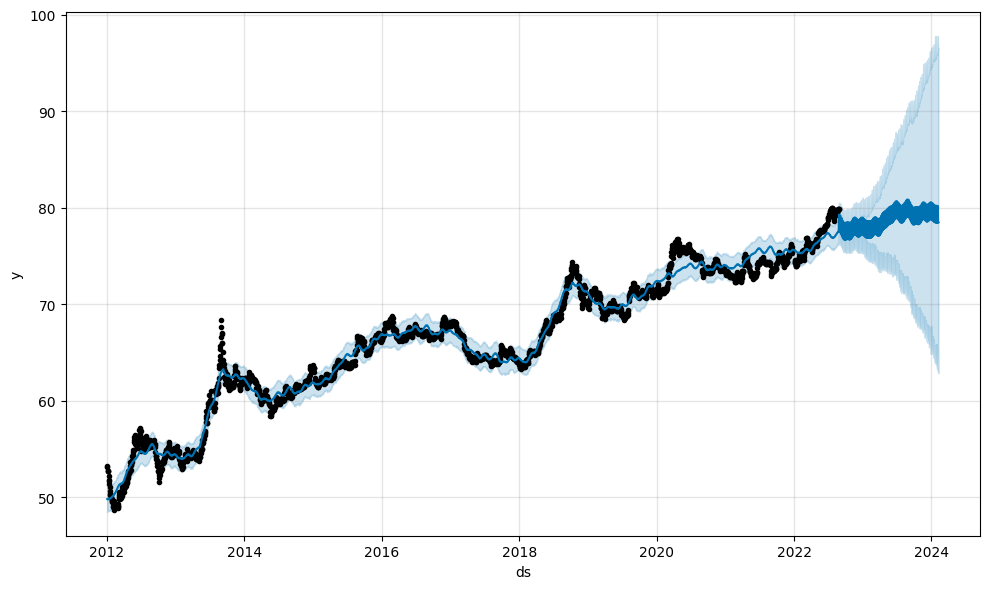

In [6]:
from prophet import Prophet

# Assuming your DataFrame is named 'full_data'
# Assuming the index is your 'Date' column
full_data.reset_index(inplace=True)

# Choose a target currency for prediction (e.g., 'USD')
target_currency = currency_dict[target_currency_code]

# Features (X) are all columns except the target currency
X = full_data.drop(target_currency, axis=1)

# Target variable (y) is the chosen currency
y = full_data[target_currency]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the relevant columns for the model
selected_columns = ['Date', target_currency]
df_prophet = full_data[selected_columns].copy()

# Rename columns to 'ds' and 'y'
df_prophet.rename(columns={'Date': 'ds', target_currency: 'y'}, inplace=True)

# Initialize and fit the model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Create a dataframe with future dates for prediction
future = model_prophet.make_future_dataframe(periods=len(X_test))

# Make predictions
forecast = model_prophet.predict(future)

# Plot the forecast
fig = model_prophet.plot(forecast)

In [7]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-03,50.464086,48.501356,51.057640,50.464086,50.464086,-0.630838,-0.630838,-0.630838,-0.484888,-0.484888,-0.484888,-0.145950,-0.145950,-0.145950,0.0,0.0,0.0,49.833248
1,2012-01-04,50.490462,48.624194,51.097290,50.490462,50.490462,-0.640937,-0.640937,-0.640937,-0.474620,-0.474620,-0.474620,-0.166318,-0.166318,-0.166318,0.0,0.0,0.0,49.849525
2,2012-01-05,50.516839,48.724577,51.074015,50.516839,50.516839,-0.679580,-0.679580,-0.679580,-0.491185,-0.491185,-0.491185,-0.188395,-0.188395,-0.188395,0.0,0.0,0.0,49.837259
3,2012-01-06,50.543216,48.596355,51.050857,50.543216,50.543216,-0.716142,-0.716142,-0.716142,-0.504321,-0.504321,-0.504321,-0.211821,-0.211821,-0.211821,0.0,0.0,0.0,49.827074
4,2012-01-09,50.622346,48.620887,51.005130,50.622346,50.622346,-0.807329,-0.807329,-0.807329,-0.520888,-0.520888,-0.520888,-0.286441,-0.286441,-0.286441,0.0,0.0,0.0,49.815018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,2024-02-03,79.575385,65.334045,97.489533,64.562728,97.587792,0.634604,0.634604,0.634604,1.237950,1.237950,1.237950,-0.603346,-0.603346,-0.603346,0.0,0.0,0.0,80.209989
3174,2024-02-04,79.579704,64.960921,97.807105,64.518567,97.605906,0.628894,0.628894,0.628894,1.237950,1.237950,1.237950,-0.609056,-0.609056,-0.609056,0.0,0.0,0.0,80.208598
3175,2024-02-05,79.584022,63.048840,96.478908,64.445457,97.624019,-1.135394,-1.135394,-1.135394,-0.520888,-0.520888,-0.520888,-0.614507,-0.614507,-0.614507,0.0,0.0,0.0,78.448628
3176,2024-02-06,79.588340,63.005698,96.608106,64.372346,97.653623,-1.104435,-1.104435,-1.104435,-0.484888,-0.484888,-0.484888,-0.619547,-0.619547,-0.619547,0.0,0.0,0.0,78.483905


In [8]:
forecast.tail(100)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3078,2023-10-31,79.165163,67.758616,90.917416,68.069260,91.774062,-0.770267,-0.770267,-0.770267,-0.484888,-0.484888,-0.484888,-0.285380,-0.285380,-0.285380,0.0,0.0,0.0,78.394895
3079,2023-11-01,79.169481,67.681044,91.542992,68.030627,91.811669,-0.742574,-0.742574,-0.742574,-0.474620,-0.474620,-0.474620,-0.267955,-0.267955,-0.267955,0.0,0.0,0.0,78.426906
3080,2023-11-02,79.173799,67.582240,91.208797,68.001911,91.849275,-0.738947,-0.738947,-0.738947,-0.491185,-0.491185,-0.491185,-0.247762,-0.247762,-0.247762,0.0,0.0,0.0,78.434852
3081,2023-11-03,79.178117,67.490001,91.461147,67.975099,91.886882,-0.729388,-0.729388,-0.729388,-0.504321,-0.504321,-0.504321,-0.225067,-0.225067,-0.225067,0.0,0.0,0.0,78.448729
3082,2023-11-04,79.182435,69.258274,93.560454,67.948287,91.927590,1.037742,1.037742,1.037742,1.237950,1.237950,1.237950,-0.200208,-0.200208,-0.200208,0.0,0.0,0.0,80.220177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,2024-02-03,79.575385,65.334045,97.489533,64.562728,97.587792,0.634604,0.634604,0.634604,1.237950,1.237950,1.237950,-0.603346,-0.603346,-0.603346,0.0,0.0,0.0,80.209989
3174,2024-02-04,79.579704,64.960921,97.807105,64.518567,97.605906,0.628894,0.628894,0.628894,1.237950,1.237950,1.237950,-0.609056,-0.609056,-0.609056,0.0,0.0,0.0,80.208598
3175,2024-02-05,79.584022,63.048840,96.478908,64.445457,97.624019,-1.135394,-1.135394,-1.135394,-0.520888,-0.520888,-0.520888,-0.614507,-0.614507,-0.614507,0.0,0.0,0.0,78.448628
3176,2024-02-06,79.588340,63.005698,96.608106,64.372346,97.653623,-1.104435,-1.104435,-1.104435,-0.484888,-0.484888,-0.484888,-0.619547,-0.619547,-0.619547,0.0,0.0,0.0,78.483905
